<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%207%20Introduction%20to%20Well-Test%20Analysis/notebook/7_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://www.github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 589 (delta 21), reused 0 (delta 0), pack-reused 535
Receiving objects: 100% (589/589), 1.55 MiB | 19.89 MiB/s, done.
Resolving deltas: 100% (244/244), done.


In [0]:
import os, sys
sys.path.append('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/functions')

## Problem 7.1

Text(0, 0.5, 'Pressure (psia)')

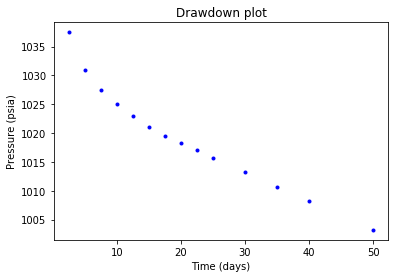

In [16]:
"Task. determine permeability k and initial pressure pi"

# known: data is a drawdown test from limited reservoir
poro = 0.2
h = 20 # ft
rw = 0.25 # ft
qB = 50 # rate-Bo, unit in RB/d
mu_oil = 5 # cp
ct = 18E-06 # psi^-1
s = 0 # assuming skin factor 0

# load data
data1 = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.12-Reservoir Parameters and Pressure Data Problem 7.1 rev.csv')
plt.plot(data1.t, data1.p, '.', color='blue')
plt.title("Drawdown plot")
plt.xlabel("Time (days)"); plt.ylabel("Pressure (psia)")

From this plot, we could conclude the type of well-test is **constant-rate flow test**. We guess the `index` first, similar to Example 7.1

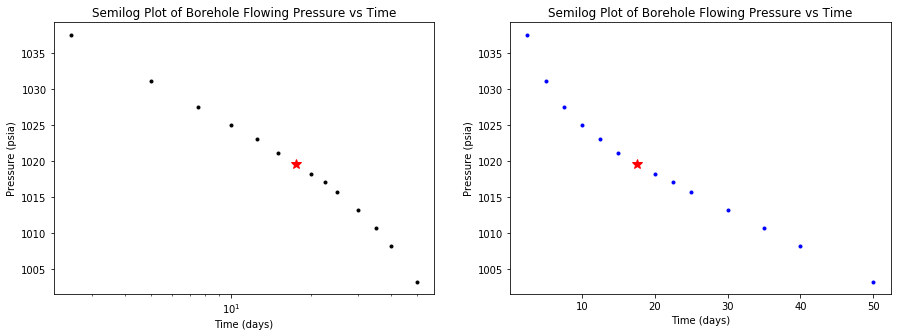

In [17]:
# guess index that mark LTR and MTR for linear region
index = 6

# semilog plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.semilogx(data1.t, data1.p, '.', color='black')
plt.title("Semilog Plot of Borehole Flowing Pressure vs Time")
plt.xlabel("Time (days)"); plt.ylabel("Pressure (psia)")

plt.semilogx(data1.t[index], data1.p[index], '*', color='red', ms=10)

# normal plot
plt.subplot(1, 2, 2)
plt.plot(data1.t, data1.p, '.', color='blue')
plt.title("Semilog Plot of Borehole Flowing Pressure vs Time")
plt.xlabel("Time (days)"); plt.ylabel("Pressure (psia)")

plt.plot(data1.t[index], data1.p[index], '*', color='red', ms=10)

In [0]:
def xy_plot_constant_rate(dataframe, index):
  "code to determine slope and intercept of MTR semilog and LTR normal plot, and finite acting time"
  "input is DATAFRAME"

  # time to reach finite-acting (LTR)
  t_finite_acting = dataframe.t[index]

  # MTR region to calculate for permeability
  df1 = dataframe.iloc[:index+1, :] # cut dataframe from index 0 to index of end of straight line
  if df1.t[0] == 0:
    dff1 = df1.drop(df1.index[0]) # drop the first row with time=0, because when log operation is underway, log(0) = indefinite
  else:
    dff1 = df1
  x1 = np.log(np.array(dff1.t))
  y1 = np.array(dff1.p)

  # LTR region to calculate for skin factor
  dff2 = dataframe.iloc[index:, :] # cut dataframe from index of start of straight line to the last index
  x2 = np.array(dff2.t)
  y2 = np.array(dff2.p)

  # title and labels for semilog plot of MTR and LTR
  title1 = "Semilog Plot of Borehole Flowing Pressure vs Time"
  title2 = "Normal Plot of Borehole Flowing Pressure vs Time"
  x1label = "Time (hours)"; x2label = x1label
  y1label = "Flowing Pressure (psia)"; y2label = y1label

  return(x1, y1, x2, y2, t_finite_acting)

x1, y1, x2, y2, t_finite_acting  = xy_plot_constant_rate(data1, index)

`x1` and `y1` are axes of **Plot 1: the Semilog Plot MTR**, `x2` and `y2` are axes of **Plot 2: the Normal Plot LTR**. Linear regression is done to each values of `x` and `y`'s to find each **slope `m`** and **intercept `c`**.

In [19]:
def regression(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

# slope and intercept of Plot 1
c1, m1 = regression(x1, y1)
m1_cycle = m1 * np.log(10)
# slope and intercept of Plot 2
c2, m2 = regression(x2, y2)
m2_cycle = m2 * np.log(10)

print("Time to reach finite-acting or LTR region approx.:", t_finite_acting, "days")
print("Slope of semilog plot of MTR linear region:", m1, "psi/day, or:", m1_cycle, "psi/cycle")
print("Pressure intercept of semilog plot of MTR linear region:", c1, "psia")
print("Slope of normal plot of LTR linear region:", m2, "psi/day")
print("Pressure intercept of normal plot of LTR linear region:", c1, "psia")

Time to reach finite-acting or LTR region approx.: 17.5 days
Slope of semilog plot of MTR linear region: -9.152190048218081 psi/day, or: -21.07369637327541 psi/cycle
Pressure intercept of semilog plot of MTR linear region: 1045.8894807701326 psia
Slope of normal plot of LTR linear region: -0.5011594202898888 psi/day
Pressure intercept of normal plot of LTR linear region: 1045.8894807701326 psia


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


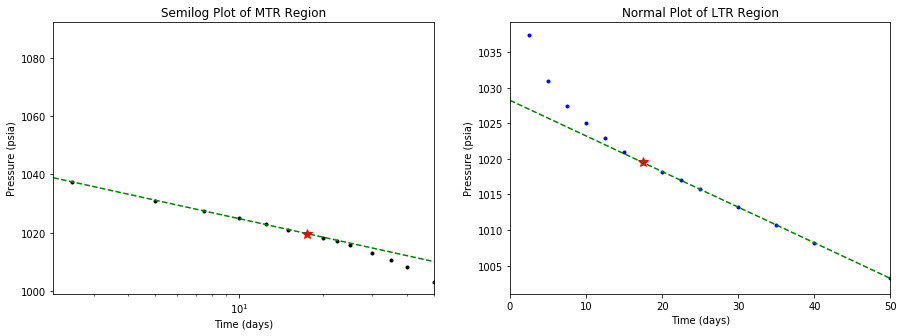

In [58]:
# straight line equation on MTR semilog plot
x_reg1 = np.arange(0.01, 51, 0.1)
y_reg1 = m1_cycle * np.log10(x_reg1) + c1

# straight line equation on LTR normal plot
x_reg2 = np.arange(0.01, 51, 0.1)
y_reg2 = m2 * x_reg2 + c2

# plot regression line on semilog plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.semilogx(data1.t, data1.p, '.', color='black')
plt.title("Semilog Plot of MTR Region")
plt.xlabel("Time (days)"); plt.ylabel("Pressure (psia)")
plt.xlim(0, 50)

plt.semilogx(data1.t[index], data1.p[index], '*', color='red', ms=10)

plt.semilogx(x_reg1, y_reg1, '--', color='g', ms=0.5)

# plot regression line on normal plot
plt.subplot(1, 2, 2)
plt.plot(data1.t, data1.p, '.', color='blue')
plt.title("Normal Plot of LTR Region")
plt.xlabel("Time (days)"); plt.ylabel("Pressure (psia)")
plt.xlim(0, 50)

plt.plot(data1.t[index], data1.p[index], '*', color='red', ms=10)

plt.plot(x_reg2, y_reg2, '--', color='g', ms=0.5)

In [24]:
"calculate permeability k"

def perm_welltest(m, mu_oil, h, q, Bo, qB):
  "Calculate permeability from well-test analysis"
  # all inputs are in OILFIELD UNITS, result in MILIDARCIES
  # input q = 0 and Bo = 0 if both are UNKNOWN, but rate-Bo is known (usually data presented in rate-Bo)
  # input qB = 0 if both q and Bo are KNOWN
  # input h = 0 if h is unknown, then permeability-factor (kh) will be calculated
  # m: slope of plot
  # c: intercept of plot

  if h == 0:
    if q == 0 and Bo == 0:
      kh = - (162.6 * qB * mu_oil) / m # perm factor (in mD-ft)
      k = "None"
    if qB == 0:
      kh = - (162.6 * q * Bo * mu_oil) / m # perm factor (in mD-ft)
      k = "None"
  else:
    if q == 0 and Bo == 0:
      k = - (162.6 * qB * mu_oil) / (m * h) # perm (in mD)
      kh = "None"
    if qB == 0:
      k = - (162.6 * q * Bo * mu_oil) / (m * h) # perm (in mD)
      kh = "None"
  return(k, kh)

k, kh = perm_welltest(m1_cycle, mu_oil, h, 0, 0, qB) # q=0, Bo=0, since qB is known
print("Permeability calculated:", k, "mD")

"calculate initial reservoir pressure pi, assuming skin factor s=0"

b1hr = m2 * 1 + c2 # pressure at 1 hour

from scipy.optimize import fsolve
def f(pi):
  f1 = 1.1513 * (((pi - b1hr) / -m1_cycle) - np.log10(k / (poro * mu_oil * ct * (rw**2))) + 3.2275) - s
  return(f1)

pi = fsolve(f, 1000)
print("Reservoir initial pressure assuming skin factor is 0:", pi, "psia")

Permeability calculated: 96.4472470324434 mD
Reservoir initial pressure assuming skin factor is 0: [1126.91129517] psia


### **BONUS**: Determine reservoir size and pore volume

In [104]:
def reservoir_size(m_star, poro, h, ct, q, Bo, qB):
  "Calculate reservoir size from CONSTANT-RATE and FINITE-BUILDUP TESTS"
  # all inputs are in OILFIELD UNITS, result in ft
  # input q = 0 and Bo = 0 if both are UNKNOWN, but rate-Bo is known (usually data presented in rate-Bo)
  # input qB = 0 if both q and Bo are KNOWN
  # input h = 0 if h is unknown, then permeability-factor (kh) will be calculated
  # m_star: slope of plot, m*

  m_star = np.abs(m_star)
  if q == 0 and Bo == 0:
    re = np.sqrt((0.07447 * qB) / (poro * h * ct * m_star))
  if qB == 0:
    re = np.sqrt((0.07447 * q * Bo) / (poro * h * ct * m_star))
  return(re)

re = reservoir_size(m2, poro, h, ct, 0, 0, qB) # q=0, Bo=0, data is in qB
print("Reservoir size calculated:", re, "ft")

def reservoir_pv(m_star, ct, q, Bo, qB):
  "Calculate reservoir pore volume from CONSTANT-RATE and FINITE-BUILDUP TESTS"
  # all inputs are in OILFIELD UNITS, result in ft
  # input q = 0 and Bo = 0 if both are UNKNOWN, but rate-Bo is known (usually data presented in rate-Bo)
  # input qB = 0 if both q and Bo are KNOWN
  # input h = 0 if h is unknown, then permeability-factor (kh) will be calculated
  # m_star: slope of plot, m*

  m_star = np.abs(m_star)
  if q == 0 and Bo == 0:
    vp = (0.23395 * qB) / (ct * m_star)
  if qB == 0:
    vp = (0.23395 * q * Bo) / (ct * m_star)
  return(vp)

vp = reservoir_pv(m2, ct, 0, 0, qB) # q=0, Bo=0, data is in qB
print("Reservoir pore volume calculated:", vp / 1E+06, "million cubic ft")

Reservoir size calculated: 321.2339823988792 ft
Reservoir pore volume calculated: 1.296715346057364 million cubic ft


## Problem 7.2

Text(0, 0.5, 'Rate-Bo (RB/day)')

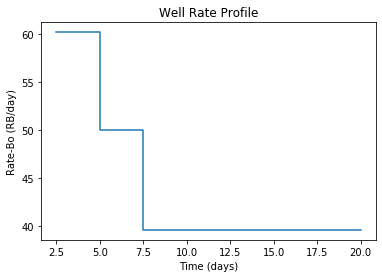

In [25]:
"Task. determine k and s from a multirate drawdown test"

# known: the same well as in Problem 7.1

poro = 0.2
h = 20 # ft
rw = 0.25 # ft
qB = 50 # rate-Bo, unit in RB/d
mu_oil = 5 # cp
ct = 18E-06 # psi^-1

time = [2.5, 5, 7.5, 15, 20]
pi_minus_pwf = [149, 130.8, 108, 110.8, 112.4]
qB = [60.2, 50, 39.6, 39.6, 39.6]

# plot well rate profile

time_step = [2.5, 5, 5, 7.5, 7.5, 15, 20]
qB_step = [60.2, 60.2, 50, 50, 39.6, 39.6, 39.6]

plt.plot(time_step, qB_step)
plt.title("Well Rate Profile")
plt.xlabel("Time (days)"); plt.ylabel("Rate-Bo (RB/day)")

Be careful with type of data as input. In this problem, the pressure is already in form of `pi - pwf`, however our function `xy_plot_multirate` takes `pwf` as input. So, function should be **modified**.

Text(0, 0.5, '(pi-pwf)/qn, psi-D/STB')

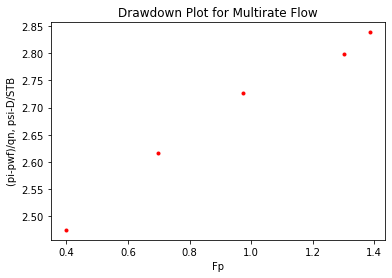

In [14]:
time = np.array([2.5, 5, 7.5, 15, 20])

time_change = np.array([5, 7.5]) # time when rate changes
qB_change = np.array([60.2, 50, 39.6]) # rate period

def xy_plot_multirate(t, pi_minus_pwf, time_change, q): 
  "this program only for TWO RATES changing. Changes of more than two can't use this program, thus must be extended and modified"
  # time_change: time series when rate changes (time1, time2)
  # rate_change: rates at time (rate1, rate2, rate3)

  Fp_arr = []
  y_arr = []

  for i in range(len(t)):
    if t[i] < time_change[0]:
      # first rate
      y = pi_minus_pwf[i] / q[0] # the y axis (pi-pwf)/qn
      Fp = ((q[0] - 0) / q[0]) * np.log10(t[i] - 0) # the x axis, plotting function
    if t[i] == time_change[0]:
      # first rate
      y = pi_minus_pwf[i] / q[1] # the y axis (pi-pwf)/qn
      Fp = ((q[0] - 0) / q[0]) * np.log10(t[i] - 0) # the x axis, plotting function
    if t[i] > time_change[0] and t[i] < time_change[1]:
      # second rate
      y = pi_minus_pwf[i] / q[1] # the y axis (pi-pwf)/qn
      Fp = (((q[1] - q[0]) / q[1]) * np.log10(t[i] - time_change[0])) + (((q[0] - 0) / q[1]) * np.log10(t[i] - 0)) # the x axis, plotting function
    if t[i] == time_change[1]:
      # second rate
      y = pi_minus_pwf[i] / q[2] # the y axis (pi-pwf)/qn
      Fp = (((q[1] - q[0]) / q[1]) * np.log10(t[i] - time_change[0])) + (((q[0] - 0) / q[1]) * np.log10(t[i] - 0)) # the x axis, plotting function
    if t[i] > time_change[1]:
      # third rate
      y = pi_minus_pwf[i] / q[2] # the y axis (pi-pwf)/qn
      Fp = (((q[2] - q[1]) / q[2]) * np.log10(t[i] - time_change[1])) + (((q[1] - q[0]) / q[2]) * np.log10(t[i] - time_change[0])) + (((q[0] - 0) / q[2]) * np.log10(t[i] - 0)) # the x axis, plotting function
  
    Fp_arr.append(float(Fp))
    y_arr.append(float(y))

  return(Fp_arr, y_arr)

Fp_arr, y_arr = xy_plot_multirate(time, pi_minus_pwf, time_change, qB_change)
plt.plot(Fp_arr, y_arr, '.', color='r')
plt.title('Drawdown Plot for Multirate Flow')
plt.xlabel('Fp'); plt.ylabel('(pi-pwf)/qn, psi-D/STB')

In [21]:
x = np.array(Fp_arr)
y = np.array(y_arr)
c, m = regression(x, y)
print("Slope of drawdown plot:", m)
print("Intercept of drawdown plot:", c, "psi-D/STB")

Slope of drawdown plot: 0.3529850823378056
Intercept of drawdown plot: 2.355140071911612 psi-D/STB


Text(0, 0.5, '(pi-pwf)/qn, psi-D/STB')

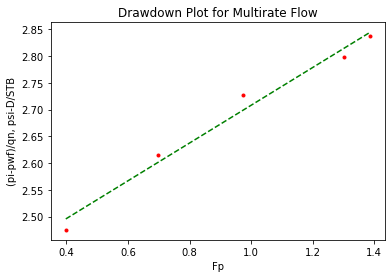

In [23]:
y_reg = m * x + c

plt.plot(Fp_arr, y_arr, '.', color='r')
plt.plot(x, y_reg, '--', color='g')
plt.title('Drawdown Plot for Multirate Flow')
plt.xlabel('Fp'); plt.ylabel('(pi-pwf)/qn, psi-D/STB')

Information is incomplete. Equation to solve for k is: `k = (162.6 * Bo * mu_oil) / (m * h)` (Equation 7.29). `Bo` is not known. `s` depends also on `k`, so `s` (Equation 7.30) cannot be calculated.

## Problem 7.3

To solve buildup analysis using 2 methods:
* **Infinite-acting buildup theory** (Chapter 7.5)
* **Finite-acting buildup theory** (Chapter 7.7)

### Infinite-acting buildup theory

Text(0, 0.5, 'Pressure (psi)')

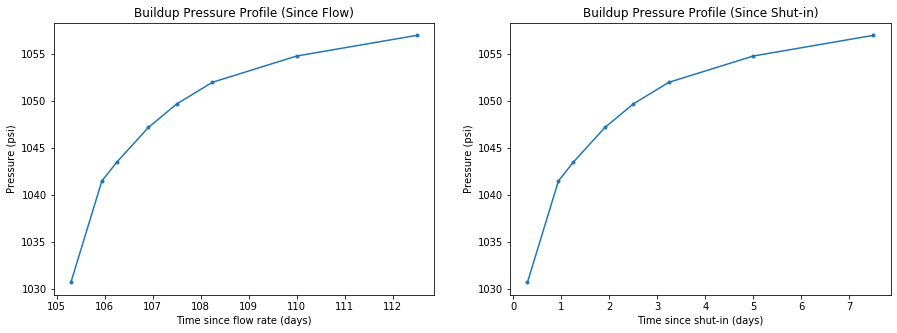

In [49]:
"Task 1. determine permeability k using INFINITE-ACTING BUILDUP THEORY"

data3 = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.14-Buildup Data Problem 7.3.csv')

time_flow = 105 # in days, flow for 105 days, then shut-in for build-up
time_since_flow = data3.t + time_flow # convert hours to date

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(time_since_flow, data3.p, '.-')
plt.title('Buildup Pressure Profile (Since Flow)')
plt.xlabel('Time since flow rate (days)'); plt.ylabel('Pressure (psi)')

plt.subplot(1, 2, 2)
plt.plot(data3.t, data3.p, '.-')
plt.title('Buildup Pressure Profile (Since Shut-in)')
plt.xlabel('Time since shut-in (days)'); plt.ylabel('Pressure (psi)')

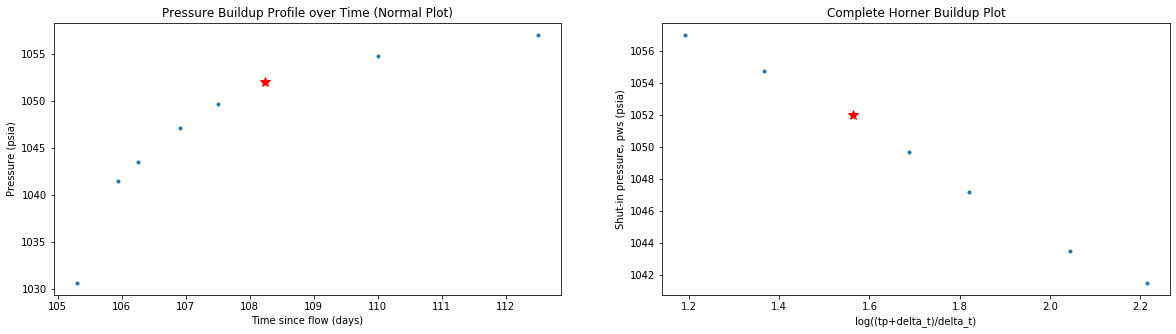

In [52]:
# calculate x Horner axis: log((tp + delta_t) / delta_t)

delta_t = data3.t - data3.t[0]
x_horner = np.log10((time_flow + delta_t) / delta_t)
horner = pd.DataFrame({"Time(hour)": data3.t, "logtime": x_horner, "Shut-in pressure(psia)": data3.p})

"Guess index that separates MTR (infinite acting) and LTR (finite acting)"
index = 5

plt.figure(figsize=(20, 5))

p0 = plt.subplot(1, 2, 1)
p0 = plt.plot(time_since_flow, data3.p, '.')
p0 = plt.title('Pressure Buildup Profile over Time (Normal Plot)')
p0 = plt.xlabel('Time since flow (days)'); plt.ylabel('Pressure (psia)')
p0 = plt.plot(time_since_flow[index], data3.p[index], '*', color='red', ms=10)

# Horner plot

p1 = plt.subplot(1, 2, 2)
p1 = plt.plot(x_horner, data3.p, '.')
p1 = plt.title('Complete Horner Buildup Plot')
p1 = plt.xlabel('log((tp+delta_t)/delta_t)'); plt.ylabel('Shut-in pressure, pws (psia)')
p1 = plt.plot(x_horner[index], data3.p[index], '*', color='red', ms=10)

In [59]:
# cut dataframe from index 0 to index of end of straight line
dfhorner = horner.iloc[index:, :]

# # linear regression to find slope and intercept of a straight line

x = dfhorner.iloc[:, 1]
y = dfhorner.iloc[:, 2]

c, m = regression(x, y)
pi = c # initial pressure equals to intercept c
print("Slope of linear-region Horner plot:", m)
print("Intercept of linear-region Horner plot:", c, "psia")
print("The initial reservoir pressure equals to the intercept:", pi, "psia")

Slope of linear-region Horner plot: -13.469529183069632
Intercept of linear-region Horner plot: 1073.115547476089 psia
The initial reservoir pressure equals to the intercept: 1073.115547476089 psia


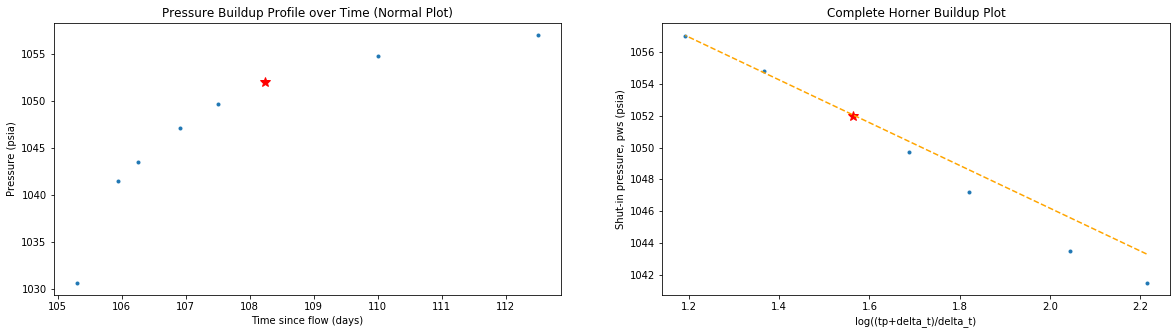

In [64]:
# Plot the regression line

# drop the first row with time=0, because when log operation is underway, log(0) = indefinite
x_cut = horner.drop(horner.index[0])

x_reg = x_cut.iloc[:, 1]
y_reg = m * x_reg + c

plt.figure(figsize=(20, 5))

# Normal plot

p0 = plt.subplot(1, 2, 1)
p0 = plt.plot(time_since_flow, data3.p, '.')
p0 = plt.title('Pressure Buildup Profile over Time (Normal Plot)')
p0 = plt.xlabel('Time since flow (days)'); plt.ylabel('Pressure (psia)')
p0 = plt.plot(time_since_flow[index], data3.p[index], '*', color='red', ms=10)

# Horner plot

p1 = plt.subplot(1, 2, 2)
p1 = plt.plot(x_horner, data3.p, '.')
p1 = plt.title('Complete Horner Buildup Plot')
p1 = plt.xlabel('log((tp+delta_t)/delta_t)'); plt.ylabel('Shut-in pressure, pws (psia)')
p1 = plt.plot(x_horner[index], data3.p[index], '*', color='red', ms=10)

p1 = plt.plot(x_reg, y_reg, '--', color='orange')

In [66]:
# calculate permeability

# known: the same well as in Problem 7.1

poro = 0.2
h = 20 # ft
rw = 0.25 # ft
qB = 50 # rate-Bo, unit in RB/d
mu_oil = 5 # cp
ct = 18E-06 # psi^-1

k, kh = perm_welltest(m, mu_oil, h, 0, 0, qB) # q=0, Bo=0, only qB is known
print("Permeability calculated from buildup analysis using infinite-acting theory:", k, "mD")

Permeability calculated from buildup analysis using infinite-acting theory: 150.89614286999188 mD


### Finite-acting buildup theory

Text(0, 0.5, 'pws-m*delta_t (psia)')

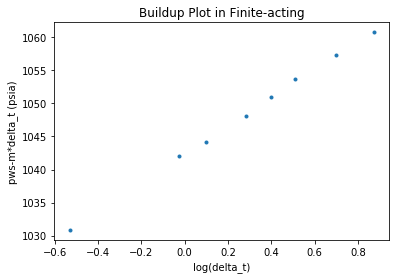

In [71]:
"Task 2. determine permeability k using FINITE-ACTING BUILDUP THEORY"

# known: the similar well in Problem 7.1, it means we can use the DRAWDOWN PRESSURE RATE as m* and use Slider's method

m_star = m2 # in psi/day

# buildup plot
x = np.log10(data3.t)
y = data3.p - (m_star * data3.t)

plt.plot(x, y, '.')
plt.title('Buildup Plot in Finite-acting')
plt.xlabel('log(delta_t)'); plt.ylabel('pws-m*delta_t (psia)')

In [72]:
# linear regression to find slope m and intercept C
c, m = regression(x, y)
pi = c # initial pressure equals to intercept c5
print("Slope of buildup plot (m):", m, "psi/cycle")
print("Intercept of buildup plot (C):", c, "psia")

Slope of buildup plot (m): 21.399138084135174 psi/cycle
Intercept of buildup plot (C): 1042.3104775730383 psia


Text(0, 0.5, 'pws-m*delta_t (psia)')

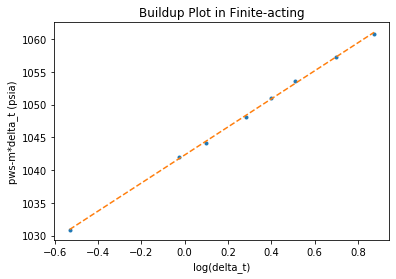

In [74]:
# plot regression line

x_reg = x
y_reg = m * x_reg + c

plt.plot(x, y, '.')
plt.plot(x_reg, y_reg, '--')
plt.title('Buildup Plot in Finite-acting')
plt.xlabel('log(delta_t)'); plt.ylabel('pws-m*delta_t (psia)')

In [76]:
# calculate permeability-factor
k = - (162.6 * qB * mu_oil) / (m * h)
print("Permeability calculated from buildup analysis using finite-acting theory:", np.abs(k), "mD")

Permeability calculated from buildup analysis using finite-acting theory: 94.98046098907359 mD


Permeability calculated using **infinite-acting buildup analysis** is 150 mD, and using **finite-acting buildup analysis** is 95 mD. So, permeability in range 95 to 150 mD. 